# Quantum Walk

In this note book we will look at the idea of classical random walk and then we will try focus on quantum walks, its relation with Markov chain and its implementation.

## 1. Markov Chains

Markov chains are mathematical models that describe a sequence of events where the probability of transitioning from one state to another depends solely on the current state and not on the sequence of events that preceded it. In a Markov chain, the system is assumed to be in one of a finite number of states at any given time, and the transition probabilities between states are specified. Probabilities are often defined on in a transition matrix which contains the probability of transition from one tate to another. It is a process that evolves over time in a way that involves a certain degree of randomness or uncertainty. 

## 2. Classical Random Walks

A classical random walk is a mathematical model that describes the stochastic process of a particle moving through a sequence of discrete steps, where the direction of each step is determined randomly.

#### Working algorithm:

1. Initialize Parameters: Set the initial position of the particle and define stopping criterion.
2. Perform Random Steps: At each time step generate a random parameter and take next step depending upon that(for 1-D line coin flip is common practice).

In a classical random walk, a walker moves from one location to another based on random decisions. In a quantum walk, the walker is described by a quantum state, and its evolution is governed by quantum mechanics. Unlike classical random walks, quantum walks can exhibit interference effects, leading to unique and non-classical behavior.

The connection between quantum walks and Markov chains lies in their respective classical and quantum counterparts. Classical random walks can be seen as a special case of Markov chains, where the probabilities of transitioning between states are purely classical probabilities. Quantum walks extend this idea to the quantum realm, where the evolution is described by unitary transformations and quantum probabilities.

## 3. Quantum Walk

A quantum walk is a quantum mechanical analog of classical random walks or Markov chains. The evolution of the particle is governed by unitary operators, and instead of probabilistic outcomes, quantum probability amplitudes determine the likelihood of different paths. The unique ability of particles to exist in multiple states simultaneously, known as superposition, enables them to explore all potential paths concurrently. This expansive exploration continues until a measurement is performed. Quantum interference, a phenomenon arising from the combination of these states, selectively enhances or cancels out certain outcomes. By strategically designing quantum walk algorithms, undesired possibilities can be efficiently suppressed through interference, allowing correct paths to accumulate and yielding faster computation compared to classical counterparts.

#### Grover's Algorithm

Grover's Algorithm is designed to search an unsorted database or solve unstructured search problems quadratically faster than classical algorithms.

###### General idea of how Grover's algorithm

1. State Initialization: Grover's algorithm initializes the quantum state with an amplitude amplification technique. This helps prepare the quantum state in a superposition that is more likely to lead to the desired outcome.
2. Oracle Construction: Formation of efficient quantum oracle for marking the target states in the quantum walk.
3. Amplitude Amplification: Enhancing the probability of measuring desired state during the evolution of the quantum walk and minimizing the amplitude other non-desired states.

Grover's algorithm can be a valuable tool in quantum walk implementations by aiding in state preparation, oracle construction, amplitude amplification, and overall improving the efficiency of searching for specific states. 

### 3.1 Coined Quantum Walks

In quantum walk models, two prominent paradigms emerge as pioneers: the Coin-Operator Quantum Walks and the Szegedy Quantum Walks.The approach in both models are different but they assembles equivalence under specific circumstances. In this module will we we move ahead with Coined Quantum Walks.

An illustrative instance of a coined quantum walk manifests in the traversal of an infinite integer line. The walker's trajectory is dictated by a quantum coin, directing the nuanced dynamics of movement through the space.

In the coin-based quantum walk model, there exist two fundamental quantum states accompanied by two distinct operators. 
1. The initial state signifies the walker's position, aptly named the position state ($\mathcal{H}_P$)
2. while the second state pertains to the coin state($\mathcal{H}_C$), dictating the walker's directional choices in subsequent steps. Both the coin state and the position state find representation through vectors within the expansive realm of Hilbert space $\mathcal{H} = \mathcal{H}_C \otimes \mathcal{H}_P$

The model incorporates two pivotal operators: the coin operator and the shift operator. 
1. Operating on the coin vector during each temporal step, the coin operator gracefully propels the walker into a state of superposition, allowing it to traverse an array of potential paths concurrently. There are different coin operators, but the most common ones are the Hadamard coin and the Grover coin.

A Hadamard coin is a Hadamard gate that puts the walker in an equal superposition:

$$H = \frac{1}{\sqrt{2}} 
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

A Grover coin is the Grover diffusion operator from Grover's algorithm. We define it as

$$\begin{equation}
    G = 
    \begin{bmatrix}
\frac{2}{n} -1 & \frac{2}{n} & \ldots & \frac{2}{n}\\
\frac{2}{n} & \frac{2}{n} - 1  & \ldots & \frac{2}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{2}{n} & \frac{2}{n} & \ldots & \frac{2}{n} -1
\end{bmatrix}
\end{equation}$$

2. The shift operator, acts on position vector and moves the walker to the next position.

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
For the walk on the integer line, the shift operator moves the walker to the left if the coin is $\ket{0}$ and to the right if the coin is $\ket{1}$:

$$
S \ket{0}\ket{j} = \ket{0}\ket{j+1}
$$

$$
S \ket{1}\ket{j} = \ket{1}\ket{j-1}
$$

With the shift operator defined as above, we can represent one step of the coined quantum walk as the unitary operator $U$ given by:

$$
U = SC
$$

where $C$ is the coin operator. For the quantum walk on the integer line we use the Hadamard coin, but $C$ can be either Hadamard coin, Grover coin or any other coin operator.


### The Coin Operator

The first operation in a quantum random walk is the coin operator. The operator works by performing an arbitrary unitary transformation in the coin space which creates a rotation similar to “coin-flip” in random walk. This is namely the Hadamard gate, which models a balanced unitary coin. 

The results are very different from random walks as it doesn’t converge to a Gaussian distribution, but rather evolves into an asymmetric probability distribution. This happens because the Hadamard coin operator

### 3.2 Quantum walk on a 4-dimensional hypercube

A hypercube is the $n$-dimensional counterpart of the $3$-dimensional cube. All nodes have degree $n$, and the hypercube has a total of $N=2^n$ nodes. The binary representation of the neighbors of a node will differ by only one binary number. Thus, a node is connected to all nodes to which the Hamming distance is 1. Two neighboring nodes that differ in the $a^{th}$ bit are connected by the edge labeled $a$.

The Hilbert space representing a coined quantum walk on the hypercube is $\mathcal{H} = \mathcal{H}^n \otimes \mathcal{H}^{2^n}$, where $\mathcal{H}^n$ denotes the coin space and $\mathcal{H}^{2^n}$ the walker's position.

\begin{equation}
    \big\{ \ket{a,\vec{v}}, 0 \leq a \leq n-1, \vec{v} \in  \{(00...00), (00...01), ....., (11...11 )\} \big\}. 
\end{equation}

The value of the coin computational basis $a$, which is associated with edge $a$, decides where the walker should move. Example,  If the $a=0$, the walker will go to the node where the first binary value differs from the current node, etc. Let $\vec{e}_a$ be an n-tuple where all binary values, except the value with index $a$, are $0$. Then the shift operator $S$ moves the walker from the state $\ket{a} \ket{\vec{v}}$ to $\ket{\vec{v} \oplus \vec{e}_a}$:

\begin{equation}
    S \ket{a} \ket{\vec{v}} = \ket{a} \ket{\vec{v} \oplus \vec{e}_a}.
\end{equation}

We use the Grover coin, $G$, for this walk. Thus, the evolution operator is

\begin{equation}
    U = SG.
\end{equation}

Importing Qiskid Libraries

In [47]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import QFT
from numpy import pi
from qiskit.quantum_info import Statevector
from matplotlib import pyplot as plt
import numpy as np
#provider = IBMQ.load_account()

The circuit will have 6 qubits, 4 that represents the position and 2 that represents the coin. We start by implementing this coin operator: 

In [37]:
one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 
one_step_circuit.h([4,5])
one_step_circuit.z([4,5])
one_step_circuit.cz(4,5)
one_step_circuit.h([4,5])
one_step_circuit.draw() 

q_0: ──────────────────
                       
q_1: ──────────────────
                       
q_2: ──────────────────
                       
q_3: ──────────────────
     ┌───┐┌───┐   ┌───┐
q_4: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_5: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

Now, let us implement the shift operator.  We know that, all neighboring nodes differ by only one bit. So, we move the walker by applying a NOT gate to one of the node qubits. If the coin is in state $\ket{11}$, we move the walker to the state in which the first node qubit differ. If the coin is $\ket{10}$ or $\ket{01}$, the walker moves to the state where the second and third qubit, respectively, differ. Finally, if the Grover coin is $\ket{00}$, we flip the fourth qubit. We implement this with CCNOT- and NOT gates after the Grover coin. Together, they are one step of a quantum walk on a 4-dimensional hypercube. 

In [38]:
# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction() 
one_step_circuit.draw() 

┌───┐                              
q_0: ───────────────────────┤ X ├──────────────────────────────
                            └─┬─┘     ┌───┐                    
q_1: ─────────────────────────┼───────┤ X ├────────────────────
                              │       └─┬─┘     ┌───┐          
q_2: ─────────────────────────┼─────────┼───────┤ X ├──────────
                              │         │       └─┬─┘     ┌───┐
q_3: ─────────────────────────┼─────────┼─────────┼───────┤ X ├
     ┌───┐┌───┐   ┌───┐┌───┐  │  ┌───┐  │  ┌───┐  │  ┌───┐└─┬─┘
q_4: ┤ H ├┤ Z ├─■─┤ H ├┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├──■──
     ├───┤├───┤ │ ├───┤├───┤  │  └───┘  │  ├───┤  │  └───┘  │  
q_5: ┤ H ├┤ Z ├─■─┤ H ├┤ X ├──■─────────■──┤ X ├──■─────────■──
     └───┘└───┘   └───┘└───┘               └───┘

### 3.3 Quantum walk search on 4-dimensional hypercube

The quantum walk search algorithm makes it possible to find a marked set of nodes in $O(1/\sqrt{\epsilon})$ steps, $\epsilon =  |M|/N$, where $M$ is the number of marked nodes and $N$ is the total number of nodes.

##### Algorithm:

1. A uniform superposition over all edges, by applying Hadamard gates to the node qubits as well as the coin qubits.
2. We implement a phase oracle.
3. Implementation of a phase estimation on one step of the quantum walk on the hypercube followed by marking all quantum states where $\theta \neq 0$.
3. We reverse the phase estimation.

We also need an inverse of previous circuit

In [39]:
one_step_circuit.inverse().draw() 

┌───┐                       
q_0: ──────────────────────────────┤ X ├───────────────────────
                         ┌───┐     └─┬─┘                       
q_1: ────────────────────┤ X ├───────┼─────────────────────────
               ┌───┐     └─┬─┘       │                         
q_2: ──────────┤ X ├───────┼─────────┼─────────────────────────
     ┌───┐     └─┬─┘       │         │                         
q_3: ┤ X ├───────┼─────────┼─────────┼─────────────────────────
     └─┬─┘┌───┐  │  ┌───┐  │  ┌───┐  │  ┌───┐┌───┐   ┌───┐┌───┐
q_4: ──■──┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├┤ H ├─■─┤ Z ├┤ H ├
       │  └───┘  │  ├───┤  │  └───┘  │  ├───┤├───┤ │ ├───┤├───┤
q_5: ──■─────────■──┤ X ├──■─────────■──┤ X ├┤ H ├─■─┤ Z ├┤ H ├
                    └───┘               └───┘└───┘   └───┘└───┘

To control the value of qubit we need to make controlled gates as follows:

In [40]:
inv_cont_one_step = one_step_circuit.inverse().control()
inv_cont_one_step_gate = inv_cont_one_step.to_instruction()
cont_one_step = one_step_circuit.control()
cont_one_step_gate = cont_one_step.to_instruction()

Phase estimation involves the utilization of both the controlled one-step gate and its inverse counterpart. Additionally, the Quantum Fourier Transform plays a crucial role in this process. While the phase estimation relies on the inverse Quantum Fourier Transform, the ordinary QFT becomes essential for reversing the phase estimation

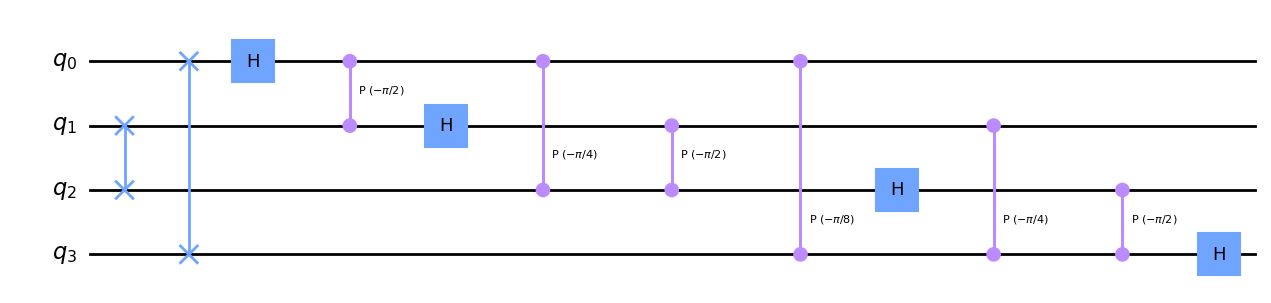

In [41]:
inv_qft_gate = QFT(4, inverse=True).to_instruction()  
qft_gate = QFT(4, inverse=False).to_instruction()

QFT(4, inverse=True).decompose().draw("mpl")

Now we will mark states 1011 and 1111 as marked states. So, we will implement oracle for this:

In [42]:
phase_circuit =  QuantumCircuit(6, name=' phase oracle ')
# Mark 1011
phase_circuit.x(2)
phase_circuit.h(3)
phase_circuit.mct([0,1,2], 3)
phase_circuit.h(3)
phase_circuit.x(2)
# Mark 1111
phase_circuit.h(3)
phase_circuit.mct([0,1,2],3)
phase_circuit.h(3)
phase_oracle_gate = phase_circuit.to_instruction()
# Phase oracle circuit
phase_oracle_circuit =  QuantumCircuit(11, name=' PHASE ORACLE CIRCUIT ')
phase_oracle_circuit.append(phase_oracle_gate, [4,5,6,7,8,9])
phase_circuit.draw() 

q_0: ───────■──────────────■───────
            │              │       
q_1: ───────■──────────────■───────
     ┌───┐  │  ┌───┐       │       
q_2: ┤ X ├──■──┤ X ├───────■───────
     ├───┤┌─┴─┐├───┤┌───┐┌─┴─┐┌───┐
q_3: ┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘
q_4: ──────────────────────────────
                                   
q_5: ──────────────────────────────

We will proceed to implement a gate that performs a rotation on an auxiliary qubit if the other qubits are non-zero. This gate will be employed in the phase estimation process, where it rotates the auxiliary qubit if $\theta \neq 0$.

In [43]:
# Mark q_4 if the other qubits are non-zero 
mark_auxiliary_circuit = QuantumCircuit(5, name=' mark auxiliary ')
mark_auxiliary_circuit.x([0,1,2,3,4])
mark_auxiliary_circuit.mct([0,1,2,3], 4)
mark_auxiliary_circuit.z(4)
mark_auxiliary_circuit.mct([0,1,2,3], 4)
mark_auxiliary_circuit.x([0,1,2,3,4])

mark_auxiliary_gate = mark_auxiliary_circuit.to_instruction()
mark_auxiliary_circuit.draw()

┌───┐               ┌───┐
q_0: ┤ X ├──■─────────■──┤ X ├
     ├───┤  │         │  ├───┤
q_1: ┤ X ├──■─────────■──┤ X ├
     ├───┤  │         │  ├───┤
q_2: ┤ X ├──■─────────■──┤ X ├
     ├───┤  │         │  ├───┤
q_3: ┤ X ├──■─────────■──┤ X ├
     ├───┤┌─┴─┐┌───┐┌─┴─┐├───┤
q_4: ┤ X ├┤ X ├┤ Z ├┤ X ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘

This step involves a phase estimation, where we take one step of the quantum walk, followed by an auxiliary qubit rotation if $\theta \neq 0$. To achieve this, we make use of the mark_auxiliary_gate that was recently created. Subsequently, we reverse the phase estimation.

In [44]:
# Phase estimation
phase_estimation_circuit = QuantumCircuit(11, name=' phase estimation ')
phase_estimation_circuit.h([0,1,2,3])
for i in range(0,4):
    stop = 2**i
    for j in range(0,stop):
        phase_estimation_circuit.append(cont_one_step, [i,4,5,6,7,8,9])

# Inverse fourier transform
phase_estimation_circuit.append(inv_qft_gate, [0,1,2,3])

# Mark all angles theta that are not 0 with an auxiliary qubit
phase_estimation_circuit.append(mark_auxiliary_gate, [0,1,2,3,10])

# Reverse phase estimation
phase_estimation_circuit.append(qft_gate, [0,1,2,3])   

for i in range(3,-1,-1):
    stop = 2**i
    for j in range(0,stop):
        phase_estimation_circuit.append(inv_cont_one_step, [i,4,5,6,7,8,9])
phase_estimation_circuit.barrier(range(0,10))
phase_estimation_circuit.h([0,1,2,3])

# Make phase estimation gate
phase_estimation_gate = phase_estimation_circuit.to_instruction()
phase_estimation_circuit.draw() 

┌───┐┌──────────────┐                                                »
 q_0: ┤ H ├┤0             ├────────────────────────────────────────────────»
      ├───┤│              │┌──────────────┐┌──────────────┐                »
 q_1: ┤ H ├┤              ├┤0             ├┤0             ├────────────────»
      ├───┤│              ││              ││              │┌──────────────┐»
 q_2: ┤ H ├┤              ├┤              ├┤              ├┤0             ├»
      ├───┤│              ││              ││              ││              │»
 q_3: ┤ H ├┤              ├┤              ├┤              ├┤              ├»
      └───┘│              ││              ││              ││              │»
 q_4: ─────┤1             ├┤1             ├┤1             ├┤1             ├»
           │  c_ ONE STEP ││              ││              ││              │»
 q_5: ─────┤2             ├┤2 c_ ONE STEP ├┤2 c_ ONE STEP ├┤2             ├»
           │              ││              ││              ││  c_ ONE STEP │»
 q_6: ─────┤3             ├┤3             ├┤3             ├┤3             ├»
           │              ││              ││              ││              │»
 q_7: ─────┤4             ├┤4             ├┤4             ├┤4             ├»
           │              ││              ││              ││              │»
 q_8: ─────┤5             ├┤5             ├┤5             ├┤5             ├»
           │              ││              ││              ││              │»
 q_9: ─────┤6             ├┤6             ├┤6             ├┤6             ├»
           └──────────────┘└──────────────┘└──────────────┘└──────────────┘»
q_10: ─────────────────────────────────────────────────────────────────────»
                                                                           »
«                                                                      »
« q_0: ────────────────────────────────────────────────────────────────»
«                                                                      »
« q_1: ────────────────────────────────────────────────────────────────»
«      ┌──────────────┐┌──────────────┐┌──────────────┐                »
« q_2: ┤0             ├┤0             ├┤0             ├────────────────»
«      │              ││              ││              │┌──────────────┐»
« q_3: ┤              ├┤              ├┤              ├┤0             ├»
«      │              ││              ││              ││              │»
« q_4: ┤1             ├┤1             ├┤1             ├┤1             ├»
«      │              ││              ││              ││              │»
« q_5: ┤2             ├┤2             ├┤2             ├┤2             ├»
«      │  c_ ONE STEP ││  c_ ONE STEP ││  c_ ONE STEP ││              │»
« q_6: ┤3             ├┤3             ├┤3             ├┤3 c_ ONE STEP ├»
«      │              ││              ││              ││              │»
« q_7: ┤4             ├┤4             ├┤4             ├┤4             ├»
«      │              ││              ││              ││              │»
« q_8: ┤5             ├┤5             ├┤5             ├┤5             ├»
«      │              ││              ││              ││              │»
« q_9: ┤6             ├┤6             ├┤6             ├┤6             ├»
«      └──────────────┘└──────────────┘└──────────────┘└──────────────┘»
«q_10: ────────────────────────────────────────────────────────────────»
«                                                                      »
«                                                                      »
« q_0: ────────────────────────────────────────────────────────────────»
«                                                                      »
« q_1: ────────────────────────────────────────────────────────────────»
«                                                                      »
« q_2: ────────────────────────────────────────────────────────────────»
«      ┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐»
« q_3: ┤0             ├┤0             ├┤0    

Now, let's delve into the complete quantum walk search algorithm. We initiate the process by implementing Hadamard gates on both the node and coin qubits. Subsequently, we proceed with the iterative application of the phase oracle gate and the phase estimation gate

In [45]:
# Implementation of the full quantum walk search algorithm
theta_q = QuantumRegister(4, 'theta')
node_q = QuantumRegister(4, 'node')
coin_q = QuantumRegister(2, 'coin')
auxiliary_q = QuantumRegister(1, 'auxiliary')
creg_c2 = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(theta_q, node_q, coin_q, auxiliary_q, creg_c2)
# Apply Hadamard gates to the qubits that represent the nodes and the coin
circuit.h([4,5,6,7,8,9])
iterations = 2

for i in range(0,iterations):
    circuit.append(phase_oracle_gate, [4,5,6,7,8,9])
    circuit.append(phase_estimation_gate, [0,1,2,3,4,5,6,7,8,9,10])

circuit.measure(node_q[0], creg_c2[0])
circuit.measure(node_q[1], creg_c2[1])
circuit.measure(node_q[2], creg_c2[2])
circuit.measure(node_q[3], creg_c2[3])
circuit.draw()

┌──────────────────────┐                   »
  theta_0: ────────────────────────┤0                     ├───────────────────»
                                   │                      │                   »
  theta_1: ────────────────────────┤1                     ├───────────────────»
                                   │                      │                   »
  theta_2: ────────────────────────┤2                     ├───────────────────»
                                   │                      │                   »
  theta_3: ────────────────────────┤3                     ├───────────────────»
           ┌───┐┌─────────────────┐│                      │┌─────────────────┐»
   node_0: ┤ H ├┤0                ├┤4                     ├┤0                ├»
           ├───┤│                 ││                      ││                 │»
   node_1: ┤ H ├┤1                ├┤5   phase estimation  ├┤1                ├»
           ├───┤│                 ││                      ││                 │»
   node_2: ┤ H ├┤2                ├┤6                     ├┤2                ├»
           ├───┤│   phase oracle  ││                      ││   phase oracle  │»
   node_3: ┤ H ├┤3                ├┤7                     ├┤3                ├»
           ├───┤│                 ││                      ││                 │»
   coin_0: ┤ H ├┤4                ├┤8                     ├┤4                ├»
           ├───┤│                 ││                      ││                 │»
   coin_1: ┤ H ├┤5                ├┤9                     ├┤5                ├»
           └───┘└─────────────────┘│                      │└─────────────────┘»
auxiliary: ────────────────────────┤10                    ├───────────────────»
                                   └──────────────────────┘                   »
      c: 4/═══════════════════════════════════════════════════════════════════»
                                                                              »
«           ┌──────────────────────┐            
«  theta_0: ┤0                     ├────────────
«           │                      │            
«  theta_1: ┤1                     ├────────────
«           │                      │            
«  theta_2: ┤2                     ├────────────
«           │                      │            
«  theta_3: ┤3                     ├────────────
«           │                      │┌─┐         
«   node_0: ┤4                     ├┤M├─────────
«           │                      │└╥┘┌─┐      
«   node_1: ┤5   phase estimation  ├─╫─┤M├──────
«           │                      │ ║ └╥┘┌─┐   
«   node_2: ┤6                     ├─╫──╫─┤M├───
«           │                      │ ║  ║ └╥┘┌─┐
«   node_3: ┤7                     ├─╫──╫──╫─┤M├
«           │                      │ ║  ║  ║ └╥┘
«   coin_0: ┤8                     ├─╫──╫──╫──╫─
«           │                      │ ║  ║  ║  ║ 
«   coin_1: ┤9                     ├─╫──╫──╫──╫─
«           │                      │ ║  ║  ║  ║ 
«auxiliary: ┤10                    ├─╫──╫──╫──╫─
«           └──────────────────────┘ ║  ║  ║  ║ 
«      c: 4/═════════════════════════╩══╩══╩══╩═
«                                    0  1  2  3

Ultimately, the implementation is executed on the QASM simulator. It is observed that the circuit predominantly collapses to the marked states in a clear majority of instances.

In [ ]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator') 

# Assuming 'circuit' is defined before this line
job = execute(circuit, backend, shots=1024) 

hist = job.result().get_counts() 
plot_histogram(hist)

The above code will provide you with the probabilities of all the 16 states, and you will simultaneously observe that the probabilities of the marked states are exceptionally larger than the others.

This code is not working because I don't have an IBMQ account. You will be able to fetch the histogram from the above code once you have your IBMQ account.